<a href="https://colab.research.google.com/github/ItalianPepper/coronavirus_ita_svr/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tot dataset: 15


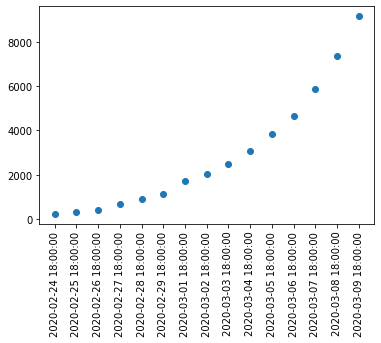

Ultimo aggiornamento del  2020-03-09 18:00:00 , numero di persone contagiate: 9172
Previsioni per il prossimo giorno: 11482
Previsioni per dopodomani: 14462
Previsioni per 3 giorni da oggi: 18002


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [211]:
import urllib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR, LinearSVR
import numpy as np
import os.path

# Download .csv file from official profile of Protezione Civile.
raw_git_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
csv_name = "dpc-covid19-ita-andamento-nazionale.csv"
urllib.request.urlretrieve(raw_git_url, csv_name)


df_ita_covid = pd.read_csv(csv_name, sep=",", header=0)
tot_casi_col = df_ita_covid["totale_casi"].tolist()
dates_col = df_ita_covid["data"].tolist()

print("Tot dataset:", len(tot_casi_col))

# Plotting time series.
plt.plot_date(dates_col, tot_casi_col, xdate=True)
plt.xticks(rotation=90)
plt.show()
plt.close()

look_back = 7

x_mod = []
y_mod = []

for i in range(look_back, len(tot_casi_col)):
  
  # Example look_back = 3:
  # -> i = 3:
  # x = {v[0], v[1], v[2]}
  # y = {v[3]}
  #
  # -> i = 4:
  # x = {v[1], v[2], v[3]}
  # y = {v[4]}
  # ecc...

  x_sample = tot_casi_col[i-look_back:i]
  
  y_sample = tot_casi_col[i]
  
  x_mod.append(x_sample)
  y_mod.append(y_sample)

# That's the formula for the next day prediction:
# X for next predictions is equal to last element of train set less the first
# element of that vector. Then adding the last value of y.
x_tmp = x_mod[len(x_mod)-1]
y_tmp = y_mod[len(y_mod)-1]
last_x = [x_tmp[i] for i in range(1, look_back)]
last_x.append(y_tmp)


# Transforming in np.array
last_x_arr = np.array(last_x).reshape(1, look_back)
x = np.array(x_mod).reshape(-1, look_back)
y = np.array(y_mod)

svr = LinearSVR(max_iter=10000)
svr.fit(x, y)

print("Ultimo aggiornamento del ", dates_col[len(dates_col)-1],
      ", numero di persone contagiate:",tot_casi_col[len(tot_casi_col)-1])


prediction = svr.predict(last_x_arr)
round_prediction = int(prediction)

print("Previsioni per il prossimo giorno:", round_prediction)

# Removing the first element from last_x and
# adding at end the last prediction.
# to create the next 2nd prediction (the day after tomorrow)

sec_day_after = [last_x[i] for i in range(1, len(last_x))]
sec_day_after.append(round_prediction)

sec_day_after_arr = np.array(sec_day_after).reshape(1, look_back)
prediction_sec = svr.predict(sec_day_after_arr)
round_prediction_sec = int(prediction_sec)

print("Previsioni per dopodomani:", round_prediction_sec)

thr_day_after = [sec_day_after[i] for i in range(1, len(sec_day_after))]
thr_day_after.append(round_prediction_sec)

thr_day_after_arr = np.array(thr_day_after).reshape(1, look_back)
prediction_thr = svr.predict(thr_day_after_arr)
round_prediction_thr = int(prediction_thr)

print("Previsioni per 3 giorni da oggi:", round_prediction_thr)